##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Train shape:", x_train.shape)
print("Test shape :", x_test.shape)

# Number of unique classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28)
Test shape : (10000, 28, 28)
Number of classes: 10


In [2]:
# Define class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


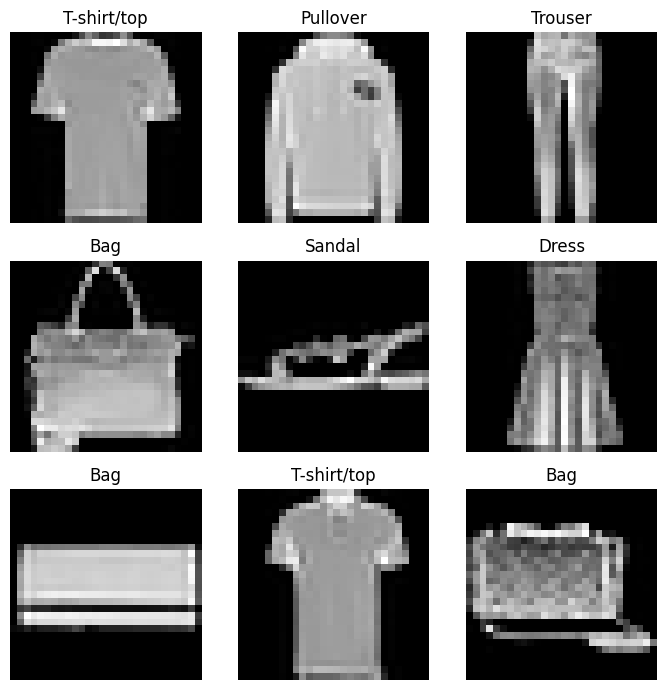

In [3]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(7,7))

indices = np.random.choice(len(x_train), 9)

for i, idx in enumerate(indices):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')

plt.tight_layout()
plt.show()


T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


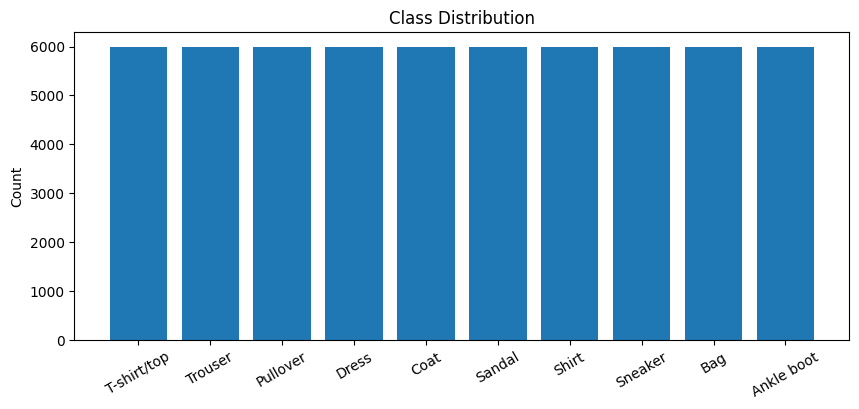

In [4]:
# Count occurrences of each class in the training set
class_counts = np.bincount(y_train)

for i, count in enumerate(class_counts):
    print(f"{class_names[i]}: {count}")


# Plot the class distribution
plt.figure(figsize=(10,4))
plt.bar(class_names, class_counts)
plt.xticks(rotation=30)
plt.title("Class Distribution")
plt.ylabel("Count")
plt.show()



### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [5]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models


# Normalize pixel values for x_train and x_test
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Add channel dimension for CNN
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

# One-hot encode the labels
# (NOT USED)

# Build a CNN model
model = models.Sequential([
    layers.Input(shape=(28,28,1)),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),

    layers.Dense(10, activation='softmax')
])

model.summary()


# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,906 (3.42 MB)

 Trainable params: 896,906 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8016 - loss: 0.5479 - val_accuracy: 0.8708 - val_loss: 0.3372
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8808 - loss: 0.3338 - val_accuracy: 0.9000 - val_loss: 0.2691
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8975 - loss: 0.2820 - val_accuracy: 0.9040 - val_loss: 0.2534
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9094 - loss: 0.2514 - val_accuracy: 0.9113 - val_loss: 0.2374
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9192 - loss: 0.2252 - val_accuracy: 0.9145 - val_loss: 0.2352
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9255 - loss: 0.2067 - val_accuracy: 0.9167 - val_loss: 0.2240
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9296 - loss: 0.1914 - val_accuracy: 0.9203 - val_loss: 0.2156
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9361 - loss: 0.1748 - 